In [2]:
import skimage.io
import gym
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def preprocess(img):
    img = img[35:195, ...]
    img = img[:,:,0]
    img[img == 144] = 0
    img[img == 109] = 0
    img[img != 0] = 1
    return img.astype(np.float32)

In [4]:
env = gym.make('Pong-v0')
obs = env.reset()
env.render()

[2016-12-19 17:34:12,080] Making new env: Pong-v0


In [8]:
prev = np.zeros_like(preprocess(obs))

In [42]:
env.step(3)
env.render()

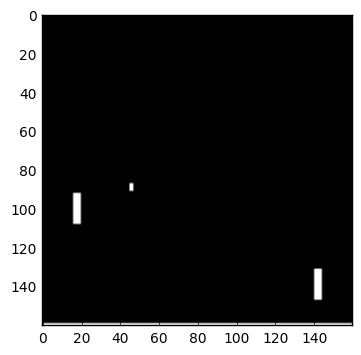

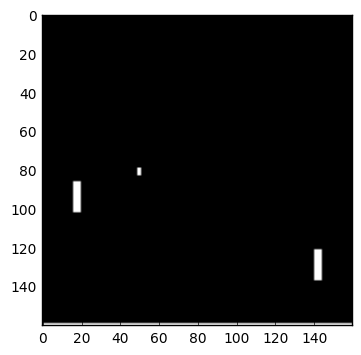

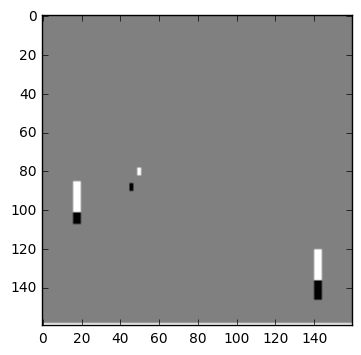

In [62]:
prev = curr
curr = preprocess(obs)
diff = curr - prev
diff[curr == 1.] = 1.
obs, _, _, _ = env.step(2)
plt.figure()
plt.imshow(prev, cmap='gray')
plt.figure()
plt.imshow(curr, cmap='gray')
plt.figure()
plt.imshow(diff, cmap='gray')

In [63]:
skimage.io.imsave('prev.png', (prev * 127 + 127).astype(np.uint8))
skimage.io.imsave('curr.png', (curr * 127 + 127).astype(np.uint8))
skimage.io.imsave('diff.png', (diff * 127 + 127).astype(np.uint8))

In [64]:
env.close()